In [4]:
import pandas as pd

In [5]:
user_log = pd.read_csv('user_log_format1[161-320].csv', iterator=True, chunksize=10000)

In [6]:
user_log = pd.concat(user_log, ignore_index=True)

In [7]:
print(user_log.head())

   user_id  item_id  cat_id  seller_id  brand_id  time_stamp  action_type
0   149002      282     885       3791    1500.0        1111            0
1   149002      282     885       3791    1500.0        1107            0
2   109881      230     629          1    1662.0         820            0
3   109881      230     629          1    1662.0         820            0
4   109881      230     629          1    1662.0         820            0


In [8]:
user_log.isnull().any()

user_id        False
item_id        False
cat_id         False
seller_id      False
brand_id        True
time_stamp     False
action_type    False
dtype: bool

In [9]:
user_log[user_log['brand_id'].isnull()]

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
422,397892,279,898,3323,NaN,528,1
3989,362997,282,885,3791,NaN,605,2
4834,276923,176,1188,2085,NaN,1107,1


In [10]:
import seaborn as sns

<ipython-input-11-3500996dae4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_log['action_type'], kde=True, hist=True)


<Axes: xlabel='action_type', ylabel='Density'>

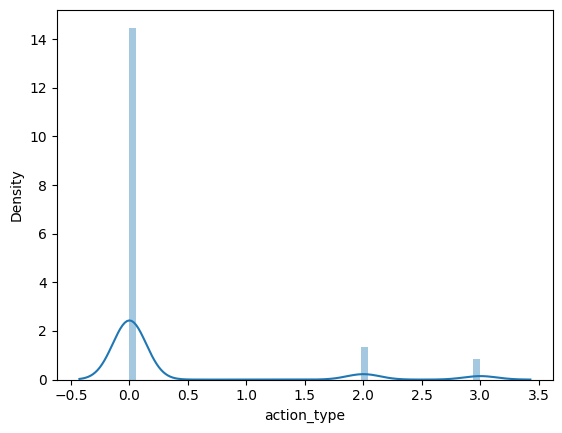

In [11]:
sns.distplot(user_log['action_type'], kde=True, hist=True)

<ipython-input-12-172c3fd48c81>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_log['cat_id'],hist=True)


<Axes: xlabel='cat_id', ylabel='Density'>

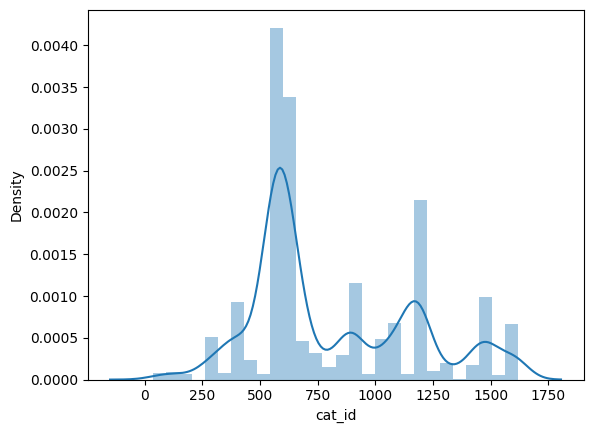

In [12]:
sns.distplot(user_log['cat_id'],hist=True)

In [13]:
user_log['time_stamp'].astype('str')

0       1111
1       1107
2        820
3        820
4        820
        ... 
6544    1111
6545    1111
6546    1110
6547    1101
6548    1111
Name: time_stamp, Length: 6549, dtype: object

In [14]:
user_log['time_str']= user_log['time_stamp'].astype('str')

In [15]:
user_log['Day']=user_log['time_stamp']%100

In [16]:
print(user_log['Day'].head())

0    11
1     7
2    20
3    20
4    20
Name: Day, dtype: int64


In [17]:
user_log['Month']=(user_log['time_stamp']-user_log['Day'])/100

In [18]:
print(user_log.head())

   user_id  item_id  cat_id  seller_id  brand_id  time_stamp  action_type  \
0   149002      282     885       3791    1500.0        1111            0   
1   149002      282     885       3791    1500.0        1107            0   
2   109881      230     629          1    1662.0         820            0   
3   109881      230     629          1    1662.0         820            0   
4   109881      230     629          1    1662.0         820            0   

  time_str  Day  Month  
0     1111   11   11.0  
1     1107    7   11.0  
2      820   20    8.0  
3      820   20    8.0  
4      820   20    8.0  


In [19]:
user_log['Month']= user_log['Month'].astype('int')

In [20]:
print(user_log.head())

   user_id  item_id  cat_id  seller_id  brand_id  time_stamp  action_type  \
0   149002      282     885       3791    1500.0        1111            0   
1   149002      282     885       3791    1500.0        1107            0   
2   109881      230     629          1    1662.0         820            0   
3   109881      230     629          1    1662.0         820            0   
4   109881      230     629          1    1662.0         820            0   

  time_str  Day  Month  
0     1111   11     11  
1     1107    7     11  
2      820   20      8  
3      820   20      8  
4      820   20      8  


<ipython-input-21-388ea8a0fc2a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_log['Month'],hist=True)


<Axes: xlabel='Month', ylabel='Density'>

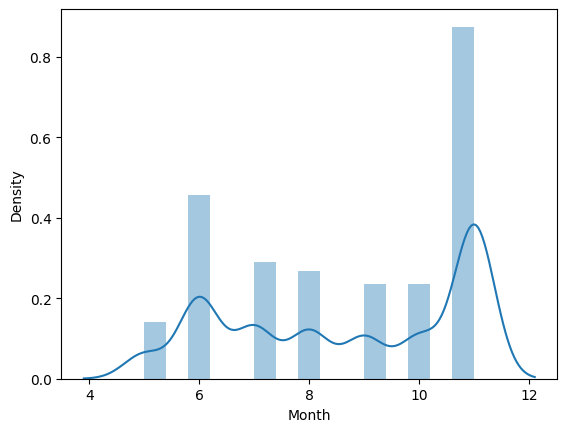

In [21]:
sns.distplot(user_log['Month'],hist=True)

In [22]:
import datetime

In [23]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,time_str,Day,Month
0,149002,282,885,3791,1500.0,1111,0,1111,11,11
1,149002,282,885,3791,1500.0,1107,0,1107,7,11
2,109881,230,629,1,1662.0,820,0,820,20,8
3,109881,230,629,1,1662.0,820,0,820,20,8
4,109881,230,629,1,1662.0,820,0,820,20,8


In [24]:
#user_id and category
user_cat_count= user_log.groupby(['user_id','cat_id']).size()

In [25]:
user_cat_click_count = user_log.groupby(['user_id','cat_id','action_type']).size().to_frame()

In [26]:
user_cat_click_count.head()

,,,0
user_id,cat_id,action_type,
297,614,0,1
867,1181,0,1
997,1467,0,1
1076,559,0,1
1295,559,0,1


In [27]:
#category action
cat_click_count = user_log.groupby(['cat_id','action_type']).size()
cat_click_count.head()

cat_id  action_type
35      0               7
71      0              17
        2               3
103     0               2
        2               1
dtype: int64

In [28]:
#brand action
brand_click_count = user_log.groupby(['brand_id','action_type']).size()
brand_click_count.head()

brand_id  action_type
68.0      0              18
69.0      0              24
          2               1
99.0      0              22
          2               1
dtype: int64

In [29]:
#merchandise action
mer_click_count = user_log.groupby(['item_id','action_type']).size()
mer_click_count.head()

item_id  action_type
161      0              4
162      0              2
163      0              6
         3              2
164      0              3
dtype: int64

In [30]:
click_activity_percent = user_log['action_type'].value_counts(normalize=True)*100

In [31]:
dict_user_cat = dict(zip(user_log['user_id'],user_log['cat_id']))

In [32]:
dict_user_brand = dict(zip(user_log['user_id'],user_log['brand_id']))

In [33]:
dict_user_merch = dict(zip(user_log['user_id'],user_log['item_id']))

In [34]:
#user category click activity
user_cat_total = user_log.groupby(['user_id','cat_id'])['action_type'].count().to_frame()
user_cat_total.head()

,,action_type
user_id,cat_id,
297,614,1
867,1181,1
997,1467,1
1076,559,1
1295,559,1


In [35]:
user_cat_total.columns = ['count total']
user_cat_total.head()

,,count total
user_id,cat_id,
297,614,1
867,1181,1
997,1467,1
1076,559,1
1295,559,1


In [36]:
user_cat_click_count.columns = ['size']

In [37]:
user_cat_click_count.head()

,,,size
user_id,cat_id,action_type,
297,614,0,1
867,1181,0,1
997,1467,0,1
1076,559,0,1
1295,559,0,1


In [38]:
user_cat_activity = user_cat_total.join(user_cat_click_count,how='left')
user_cat_activity['percentage'] = user_cat_activity['size']/user_cat_activity['count total']

In [39]:
user_cat_activity.head()

,,,count total,size,percentage
user_id,cat_id,action_type,,,
297,614,0,1,1,1.0
867,1181,0,1,1,1.0
997,1467,0,1,1,1.0
1076,559,0,1,1,1.0
1295,559,0,1,1,1.0
